In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
# Loading the dataset

df = pd.read_csv('customer_churn.csv')

In [3]:
#EDA

total_male_customers = df[df['gender'] == 'Male'].shape[0]
print("Total number of male customers:", total_male_customers)

total_dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print("Total number of customers with DSL Internet Service:", total_dsl_customers)

new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

Total number of male customers: 3555
Total number of customers with DSL Internet Service: 2421


In [4]:
new_customer = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

In [5]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

new_customer=df[(df['tenure']<10) | (df['TotalCharges']<500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


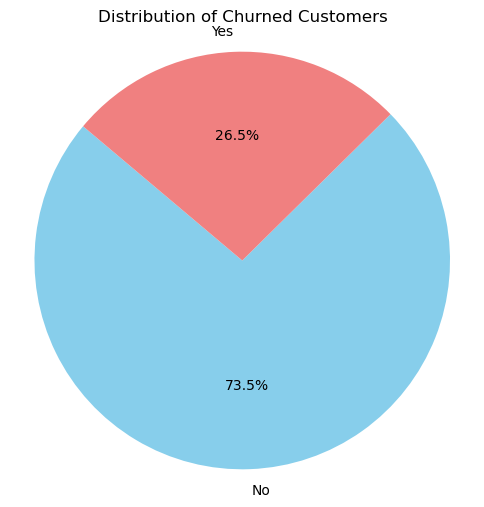

In [6]:
# Plotting pie chart to see the Distribution of Churned Customers

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churned Customers')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

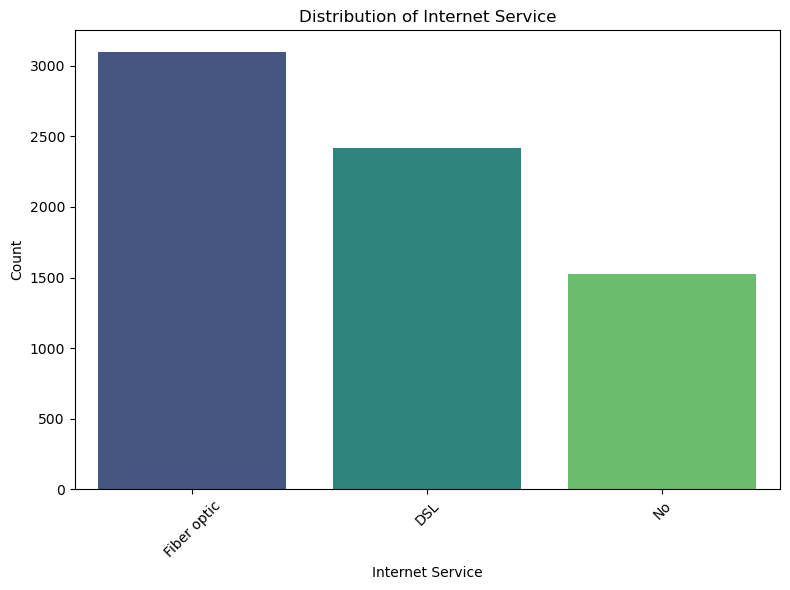

In [7]:
# Count the occurrences of each Internet Service type
internet_counts = df['InternetService'].value_counts()

#Creating a bar plot using Seaborn to see Distribution of Internet Service
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_counts.index, y=internet_counts.values, palette="viridis")
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Distribution of Internet Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Preprocessing

X = df[['tenure']].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model 1

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 2s 4ms/step - loss: 0.5524 - accuracy: 0.7304 - val_loss: 0.5077 - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7304 - val_loss: 0.5019 - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5238 - accuracy: 0.7304 - val_loss: 0.4976 - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7304 - val_loss: 0.4955 - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7302 - val_loss: 0.4941 - val_accuracy: 0.7471
Epoch 6/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5174 - accuracy: 0.7453 - val_loss: 0.4934 - val_accuracy: 0.7471
Epoch 7/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.7395 - val_loss: 0.4940 - val_accuracy: 0.7649

In [11]:
# Evaluation

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

45/45 [==============================] - 0s 2ms/step


In [12]:
confusion_matrix(y_test,y_pred)

array([[950,  86],
       [257, 116]], dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.7565649396735273

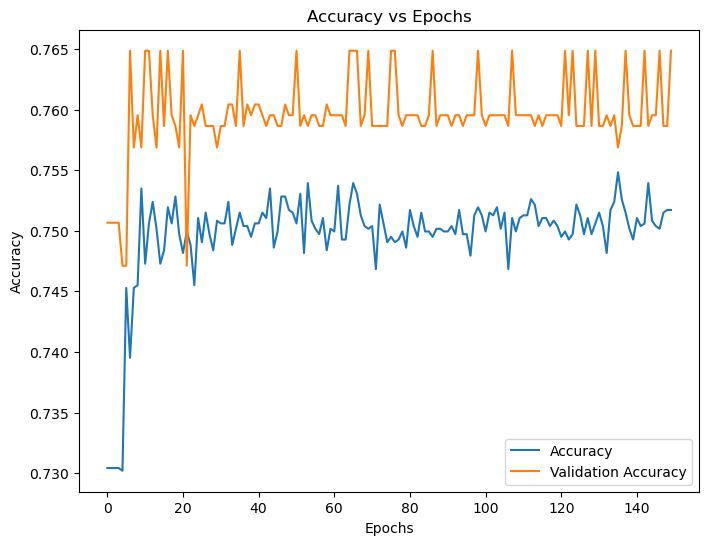

In [14]:
# Plotting the accuracy vs epochs graph

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [15]:
# Model 2 with Dropout

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer after input layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout layer after hidden layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 1s 4ms/step - loss: 0.6387 - accuracy: 0.7116 - val_loss: 0.5683 - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7315 - val_loss: 0.5146 - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7295 - val_loss: 0.5027 - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7304 - val_loss: 0.4994 - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7371 - val_loss: 0.4980 - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7389 - val_loss: 0.4964 - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7353 - val_loss: 0.4966 - val_accuracy: 0.7507

In [17]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


45/45 [==============================] - 0s 3ms/step


In [18]:
#Prediction

confusion_matrix(y_test, y_pred)

array([[982,  54],
       [289,  84]], dtype=int64)

In [19]:
# Accuracy

accuracy_score(y_test, y_pred)

0.7565649396735273

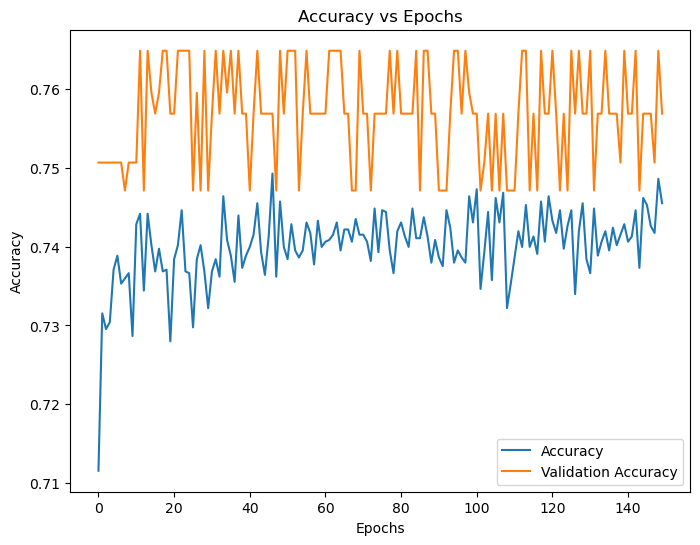

In [20]:
# Plot accuracy vs epochs graph
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [21]:
# Preprocessing

features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[features].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Model 3 - Hypertuned

model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the model

history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
141/141 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7298 - val_loss: nan - val_accuracy: 0.7507
Epoch 2/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 3/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 4/150
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 5/150
141/141 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 6/150
141/141 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 7/150
141/141 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7304 - val_loss: nan - val_accuracy: 0.7507
Epoch 8/150
141/141 [====================

In [24]:
# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

45/45 [==============================] - 0s 3ms/step


In [25]:
#Prediction

confusion_matrix(y_test, y_pred)

array([[1036,    0],
       [ 373,    0]], dtype=int64)

In [26]:
# Accuracy

accuracy_score(y_test, y_pred)

0.7352732434350603

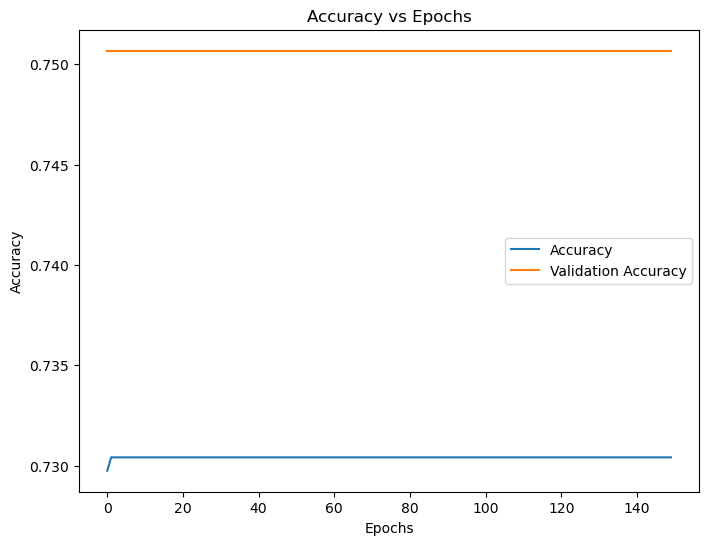

In [27]:
# Plot accuracy vs epochs graph

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()

In [ ]:
# Conclusion

#The first model gave us a mean validation accuracy of 75.65%, the second model had accuracy of 75.65% 
#and the third model had a mean validation accuracy of 73.52%.
